<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/01_Neural_Network_Regression_tensorflow_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path
file_path='/content/drive/My Drive/Colab Notebooks/car_price_prediction.csv'

#Read cvs
df=pd.read_csv(file_path)

df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
# One hot encoding of dataset
df_one_hot=pd.get_dummies(df)
df_one_hot.head()

,ID,Price,Prod. year,Cylinders,Airbags,Levy_-,Levy_1011,Levy_1016,Levy_1017,Levy_1018,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,2010,6.0,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,2011,6.0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467,2006,4.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,2011,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,2014,4.0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Create X and y
X=df_one_hot.drop("Price",axis=1)
y=df_one_hot["Price"]
X.head(),y.head()

(         ID  Prod. year  Cylinders  Airbags  Levy_-  Levy_1011  Levy_1016  \
 0  45654403        2010        6.0       12       0          0          0   
 1  44731507        2011        6.0        8       0          0          0   
 2  45774419        2006        4.0        2       1          0          0   
 3  45769185        2011        4.0        0       0          0          0   
 4  45809263        2014        4.0        4       0          0          0   
 
    Levy_1017  Levy_1018  Levy_1024  ...  Color_Green  Color_Grey  \
 0          0          0          0  ...            0           0   
 1          0          1          0  ...            0           0   
 2          0          0          0  ...            0           0   
 3          0          0          0  ...            0           0   
 4          0          0          0  ...            0           0   
 
    Color_Orange  Color_Pink  Color_Purple  Color_Red  Color_Silver  \
 0             0           0             0 

In [7]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
len(X_test), len(y_test), len(X_train), len(y_train)

(3848, 3848, 15389, 15389)

In [8]:
# Creating the model

# Set random seed
tf.random.set_seed(42)

#1 Create the model
car_price_model1=tf.keras.Sequential([tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)])

#2 Compile
car_price_model1.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=["mae"])
#3 Fit

history1=car_price_model1.fit(X_train, y_train, epochs=100, verbose=0)

In [9]:
# Check the results of the model
car_price_model1.evaluate(X_test,y_test)

121/121 [==============================] - 3s 20ms/step - loss: 12018.1279 - mae: 12018.1279


[12018.1279296875, 12018.1279296875]

Text(0.5, 0, 'epochs')

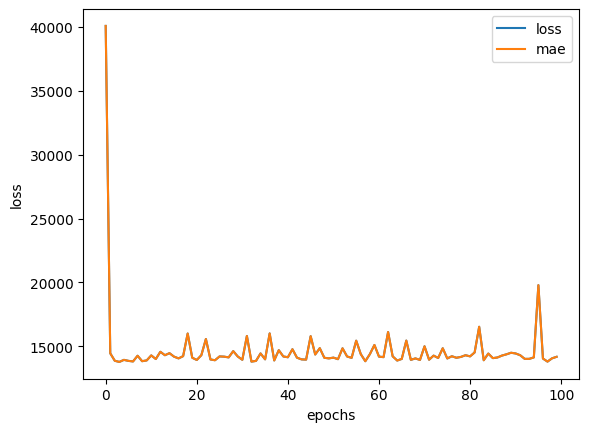

In [12]:
# Plot history - loss curve
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")